In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import util

### This notebook turns the individual watershed and GCM csvs into a single shapefile of sonoma county BCM data.

In [3]:
#Path to data
bcm_path = "../data/raw/Sonoma County_BCM/"

In [4]:
# for loop to get averages for each watershed for each GCM we're interested in
#ws_string = "SFB-PWS-*.csv" # string to get the ws/gcms we want#
ws_string = "SFB-PWS-*-HST.csv"

dfs = []
for fp in glob.glob(bcm_path + ws_string):
    _, file_name = os.path.split(fp) # split the filepath 
    read_df = util.calc_avs(fp) # calculate averages
    file_parts = file_name.split("-") # split just the file name
    read_df["watershed_num"] = file_parts[2] # get the watershed number
    gcm_clean = file_parts[3].replace('.csv','') # take out the .csv from the gcm name
    read_df["gcm"] = gcm_clean
    dfs.append(read_df)

all_ws_gcms = pd.concat(dfs)

all_ws_gcms.sample(10)

,stor,rch,run,aet,cwd,tmax,tmin,ppt,pet,watershed_num,gcm
wyear_group,,,,,,,,,,,
2010-2039,132.150000,1.086667,0.000000,52.920000,0.853333,15.960000,7.800000,68.883333,53.776667,2205300401,HST
1951-1980,179.612278,15.422194,14.988111,36.980111,60.140306,19.094667,7.316500,67.562972,97.243000,2202300002,HST
1951-1980,271.023444,5.208028,2.649250,26.781000,73.949472,22.345917,7.898667,35.239361,101.281722,6543000102,HST
2010-2039,211.853333,14.506667,11.606667,45.353333,0.000000,17.166667,5.123333,96.393333,46.123333,1114240203,HST
2010-2039,114.340000,1.790000,0.106667,51.726667,1.430000,15.633333,7.873333,68.976667,53.156667,2205300405,HST
1951-1980,175.595806,17.279028,32.584583,35.472361,62.846639,22.333778,7.105222,86.154917,98.837722,1114250502,HST
2010-2039,339.050000,1.953333,0.000000,55.876667,0.143333,19.006667,5.806667,65.376667,56.020000,3305200401,HST
2010-2039,481.673333,0.593333,0.060000,50.250000,2.460000,18.300000,6.970000,54.526667,52.706667,2205400500,HST
1951-1980,162.007944,20.017194,2.069667,29.385389,66.335639,19.811028,7.525194,52.027917,96.112111,2204200102,HST


In [6]:
# get historical baseline data
hist_baseline = all_ws_gcms.reset_index() 
hist_baseline = hist_baseline[hist_baseline["wyear_group"].isin({"1951-1980"})]
hist_baseline.to_csv("../data/clean/soco_bcm/bcm_hist_base.csv")

In [6]:
# write all of the watershed data to csv
all_ws_gcms.to_csv("../data/clean/bcm_all_ws_gcms.csv")

In [7]:
# filter to just the GCMs we are using in this analysis 
gcms_study = all_ws_gcms[all_ws_gcms["gcm"].isin({"CNRM_rcp85", "CCSM4_rcp85", "MIROC_rcp85", "GFDL_B1"})].reset_index() 
gcms_study.sample(10)

,wyear_group,stor,rch,run,aet,cwd,tmax,tmin,ppt,pet,watershed_num,gcm
5406,2010-2039,93.812521,4.625406,12.632241,25.800700,82.043613,23.443838,10.079216,43.212801,107.999104,3305400201,GFDL_B1
5738,2070-2099,251.262583,14.535306,30.593861,37.649500,69.208361,25.877778,10.836083,82.825556,106.932472,5512240204,CCSM4_rcp85
2338,2040-2069,84.238778,2.443056,7.363333,26.350556,76.393472,24.493417,11.262194,35.911917,101.713472,2204300107,MIROC_rcp85
5854,2040-2069,74.413694,15.061694,10.576944,26.078139,80.894917,25.604806,11.311278,51.013722,105.836861,5512300403,MIROC_rcp85
1453,2040-2069,270.879778,1.067167,42.073667,38.818417,62.900000,22.029806,8.939833,82.227972,101.877611,2201120201,CCSM4_rcp85
6097,2040-2069,274.935278,5.938722,0.329333,23.844639,83.842667,24.512722,10.618944,30.308611,107.915556,6543000302,CCSM4_rcp85
1874,2070-2099,186.548389,23.453278,25.523833,38.076056,69.181639,22.915278,11.462750,86.972056,107.252389,2202300001,CCSM4_rcp85
4363,2040-2069,250.582944,8.643722,13.941306,34.385639,75.480972,25.239139,10.545944,56.961778,110.000944,2207230102,GFDL_B1
3535,2040-2069,222.228389,8.840889,11.887944,33.328333,71.002806,23.382750,10.077333,54.059444,104.394361,2205500202,GFDL_B1
6157,2040-2069,233.820028,5.528444,0.020611,21.757139,86.355778,24.696000,10.688972,27.395333,108.383472,6543000403,CCSM4_rcp85


### Combine with watershed

<AxesSubplot:>

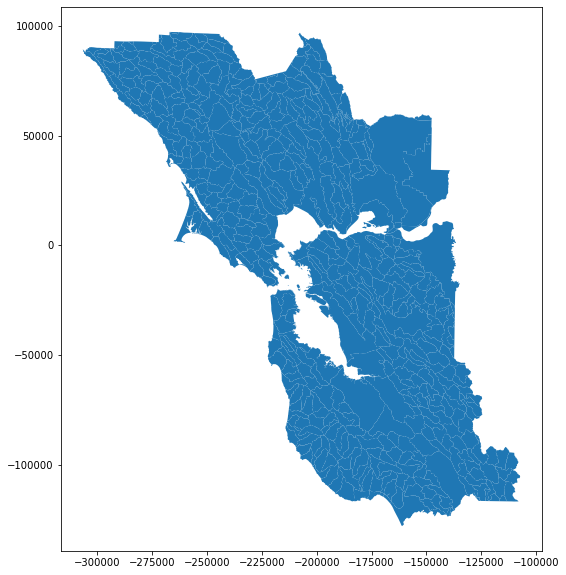

In [8]:
# read in watershed boundaries
sw_shp = gpd.read_file(bcm_path + "calw221_Bay_Area.shp")
sw_shp.plot(figsize=(10,10))

In [9]:
# combine the bcm data with the watershed shapefile
sw_shp_clean = sw_shp[["RBUASPW", "Area_acre", "geometry"]]
sw_shp_clean = sw_shp_clean.rename(columns = {'RBUASPW': 'watershed_num'})
sw_shp_clean["watershed_num"] = sw_shp_clean["watershed_num"].apply(lambda x: str(int(x)))
sw_shp_av = sw_shp_clean.merge(gcms_study, on='watershed_num', how='right')
sw_shp_av

,watershed_num,Area_acre,geometry,wyear_group,stor,rch,run,aet,cwd,tmax,tmin,ppt,pet,gcm
0,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2010-2039,251.453782,43.072549,4.196639,45.292437,48.195798,18.475434,8.134174,92.251541,93.576751,CCSM4_rcp85
1,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2040-2069,250.912778,41.594444,2.310278,44.277500,50.361389,19.210111,8.835750,88.381389,94.765833,CCSM4_rcp85
2,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2070-2099,252.077778,43.031667,8.204444,45.244167,52.318056,20.722583,10.369333,96.413611,97.572778,CCSM4_rcp85
3,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2010-2039,254.192437,54.253782,13.478431,47.660504,45.964146,18.593165,8.227675,115.008403,93.744538,CNRM_rcp85
4,1113810002,18.1784,"POLYGON ((-303124.856 90344.759, -303135.644 9...",2040-2069,256.736111,51.780278,15.500556,46.343889,48.835278,19.523694,9.179167,114.046667,95.237500,CNRM_rcp85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,6543000504,40.7237,"POLYGON ((-137154.571 -37773.150, -137163.900 ...",2040-2069,148.212500,3.975417,0.217083,25.062917,83.125278,23.578500,12.271361,29.306389,108.240000,GFDL_B1
6236,6543000504,40.7237,"POLYGON ((-137154.571 -37773.150, -137163.900 ...",2070-2099,134.826528,2.565278,0.086806,22.852083,86.149167,23.995944,12.642111,25.532500,109.015972,GFDL_B1
6237,6543000504,40.7237,"POLYGON ((-137154.571 -37773.150, -137163.900 ...",2010-2039,145.583754,1.400140,0.000000,24.774370,83.617367,23.363137,12.214986,26.152241,108.400840,MIROC_rcp85
6238,6543000504,40.7237,"POLYGON ((-137154.571 -37773.150, -137163.900 ...",2040-2069,141.565000,0.939028,0.000000,19.691806,92.181806,25.761222,14.005528,20.612000,110.675417,MIROC_rcp85


### Crop to Sonoma County watersheds

<AxesSubplot:>

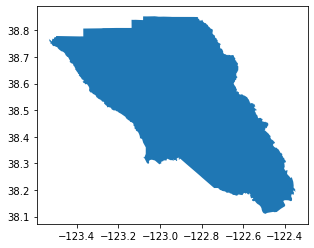

In [10]:
# read in sonoma county shapefile
soco_bound = gpd.read_file("../data/clean/sonoma_county_boundary/sonoma_county_boundary.shp")
soco_bound.plot()

In [11]:
# change crs to bcm crs
soco_crs = soco_bound.to_crs(epsg=3310)

<AxesSubplot:>

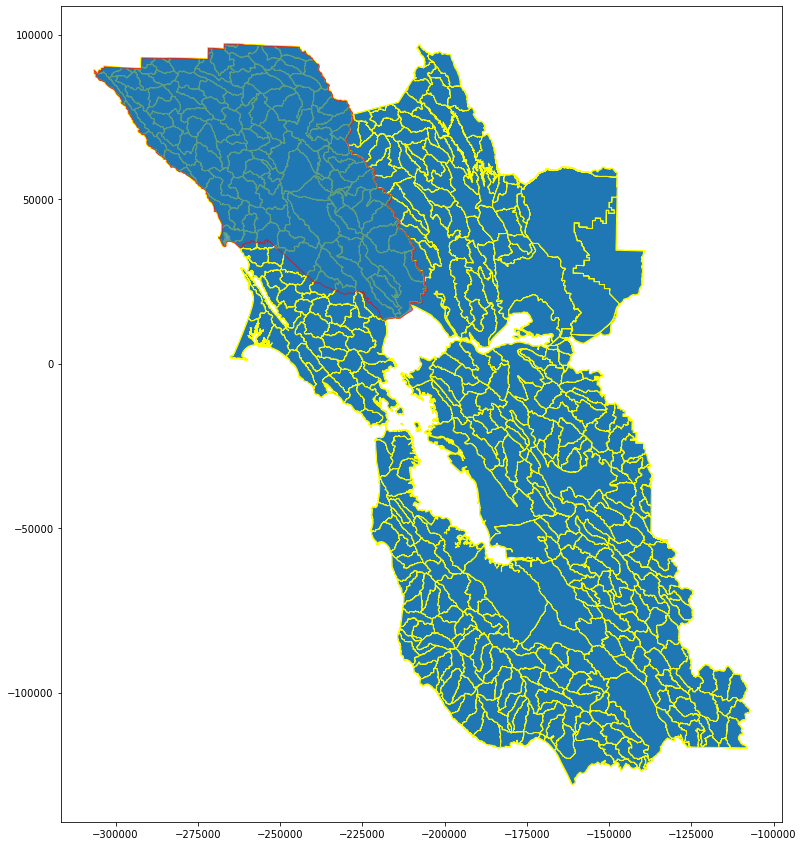

In [29]:
fig, ax = plt.subplots(figsize=(15,15))
sw_shp_av.plot(ax=ax, edgecolor = "yellow")
soco_crs.plot(ax=ax, edgecolor="red", alpha = 0.7)


<AxesSubplot:>

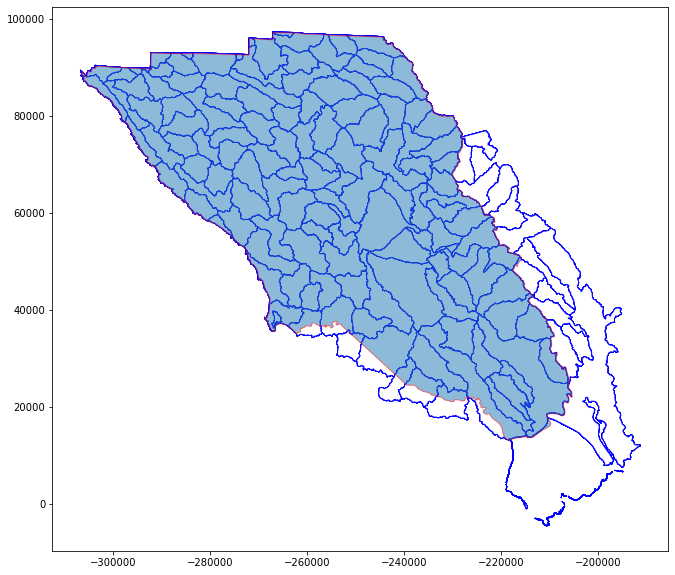

In [50]:
# just get watersheds within sonoma county
#soco_ws = gpd.overlay(sw_shp_av, soco_crs, how='intersection')
soco_ws = sw_shp_av[sw_shp_av.geometry.within(soco_crs.geometry[0]) |sw_shp_av.geometry.overlaps(soco_crs.geometry[0]) ]#.sjoin(soco_crs, how="right", op="within") 
soco_ws
fig, ax = plt.subplots(figsize=(12,10))
soco_ws.plot(ax=ax, edgecolor = "blue", color = "white")
soco_crs.plot(ax=ax, edgecolor="red", color = None, alpha = 0.5)

In [53]:
# save the shapefile
soco_ws.to_file("../data/clean/soco_bcm/soco_bcm_full_ws.shp")

C:\Users\AMarley\AppData\Local\Temp\ipykernel_22464\1389836441.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  soco_ws.to_file("../data/clean/soco_bcm/soco_bcm_full_ws.shp")


wyear_group
2010-2039    AxesSubplot(0.125,0.174147;0.62x0.656706)
2040-2069    AxesSubplot(0.125,0.174147;0.62x0.656706)
2070-2099    AxesSubplot(0.125,0.174147;0.62x0.656706)
dtype: object

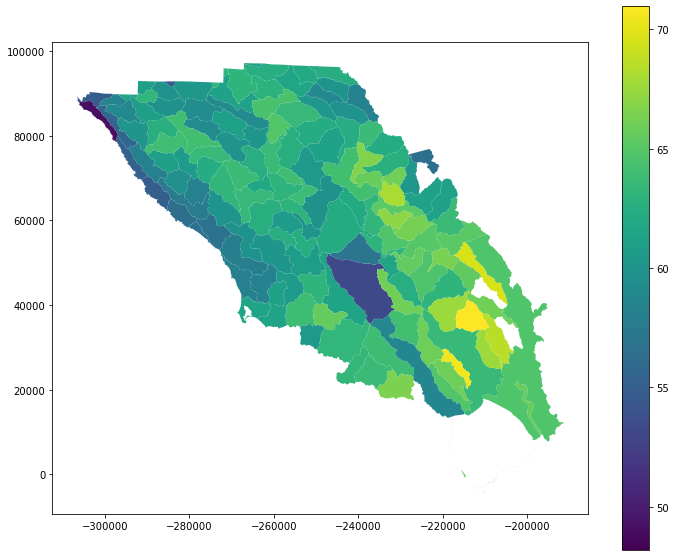

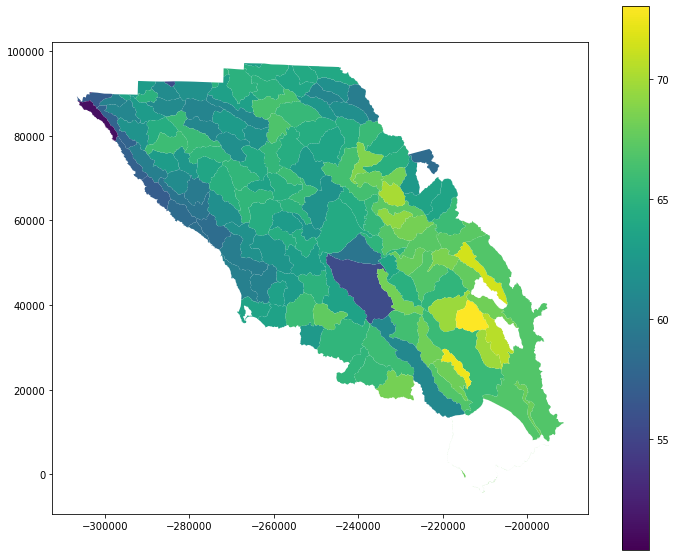

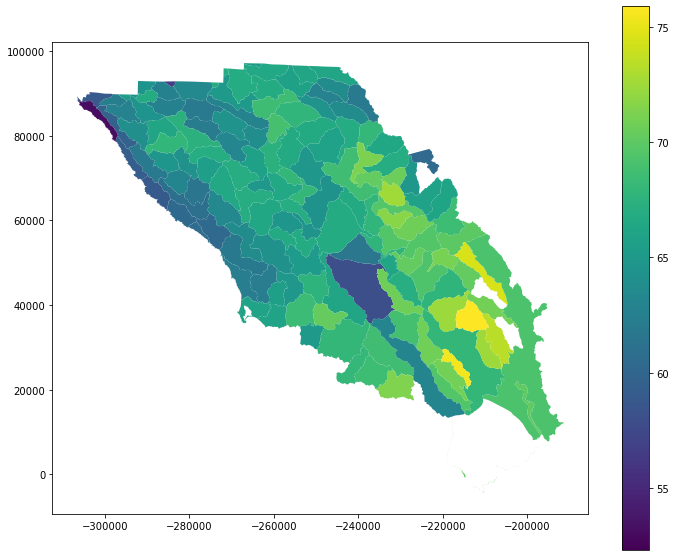

In [51]:
# Example of what the full watershed data look like
sw_shp_av_ccsm4 = soco_ws[(soco_ws["gcm"]=="CCSM4_rcp85")]
sw_shp_av_ccsm4.groupby("wyear_group").plot(column="cwd", figsize = (12,10), legend=True)

C:\Users\AMarley\AppData\Local\Temp\ipykernel_22464\1370303636.py:4: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  soco_ws_int.to_file("../data/clean/soco_bcm/soco_bcm.shp")


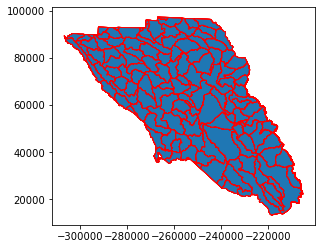

In [56]:
# intersected watersheds
soco_ws_int = gpd.overlay(sw_shp_av, soco_crs, how='intersection')
soco_ws_int.plot(edgecolor = "red")
soco_ws_int.to_file("../data/clean/soco_bcm/soco_bcm.shp")